In [1]:
# Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D  # Importing the 3D plotting module
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm

import numpy.linalg as la

# Transformers libraries
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

from my_functions import apply_TSNE, surface_reconstruction, svd

/home/ubuntu/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_id = 'openai-community/gpt2'
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, output_attentions=True)

df = pd.read_pickle("/home/ubuntu/Project/output/word_to_vector.pkl")

In [3]:
FFNN = decoder = model.transformer.h[0].mlp

first_layer_weight   = FFNN.c_fc.weight.detach().numpy()
first_layer_bias     = FFNN.c_fc.bias.detach().numpy()
second_layer_weight  = FFNN.c_proj.weight.detach().numpy()
second_layer_bias    = FFNN.c_proj.bias.detach().numpy()

print(FFNN)
print("First  layer shape: ", first_layer_weight.shape)
print("Second layer shape: ", second_layer_weight.shape)

GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
First  layer shape:  (768, 3072)
Second layer shape:  (3072, 768)


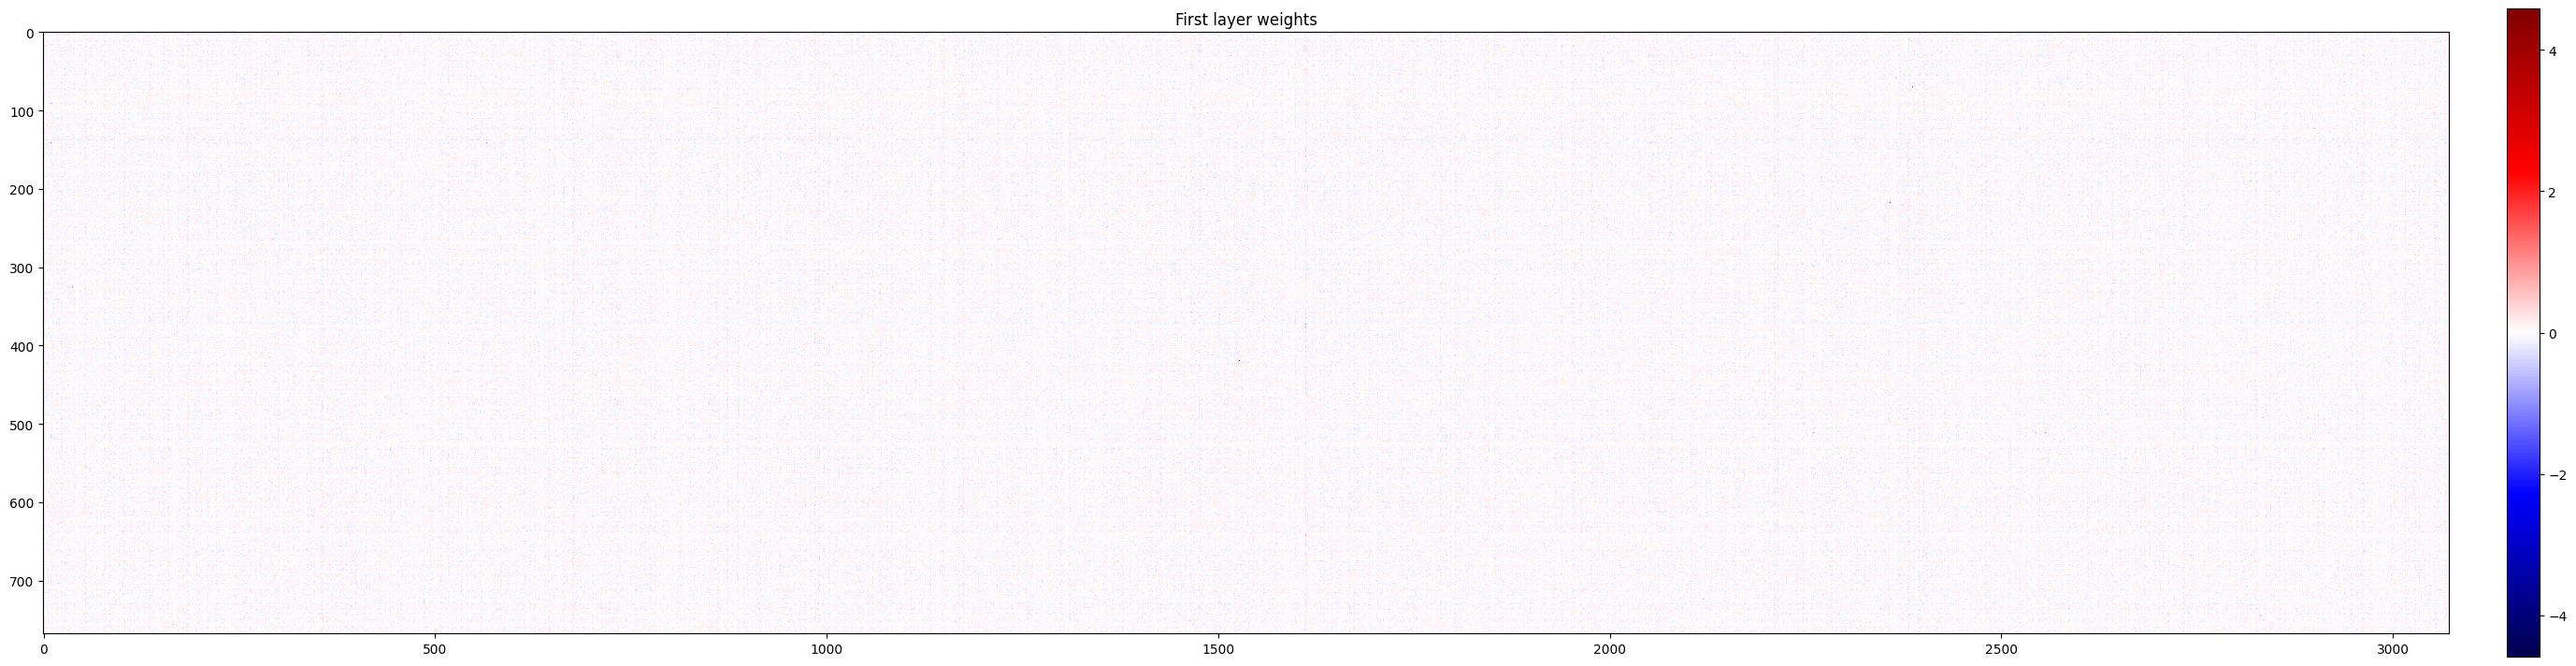

In [4]:
plt.figure(1, (40,20))
norm = TwoSlopeNorm(vmin=-np.abs(first_layer_weight).max(), vmax=np.abs(first_layer_weight).max(), vcenter=0)
plt.imshow(first_layer_weight, cmap='seismic', norm=norm)
plt.colorbar(shrink=0.45, pad=0.02)
plt.title('First layer weights')
plt.show()

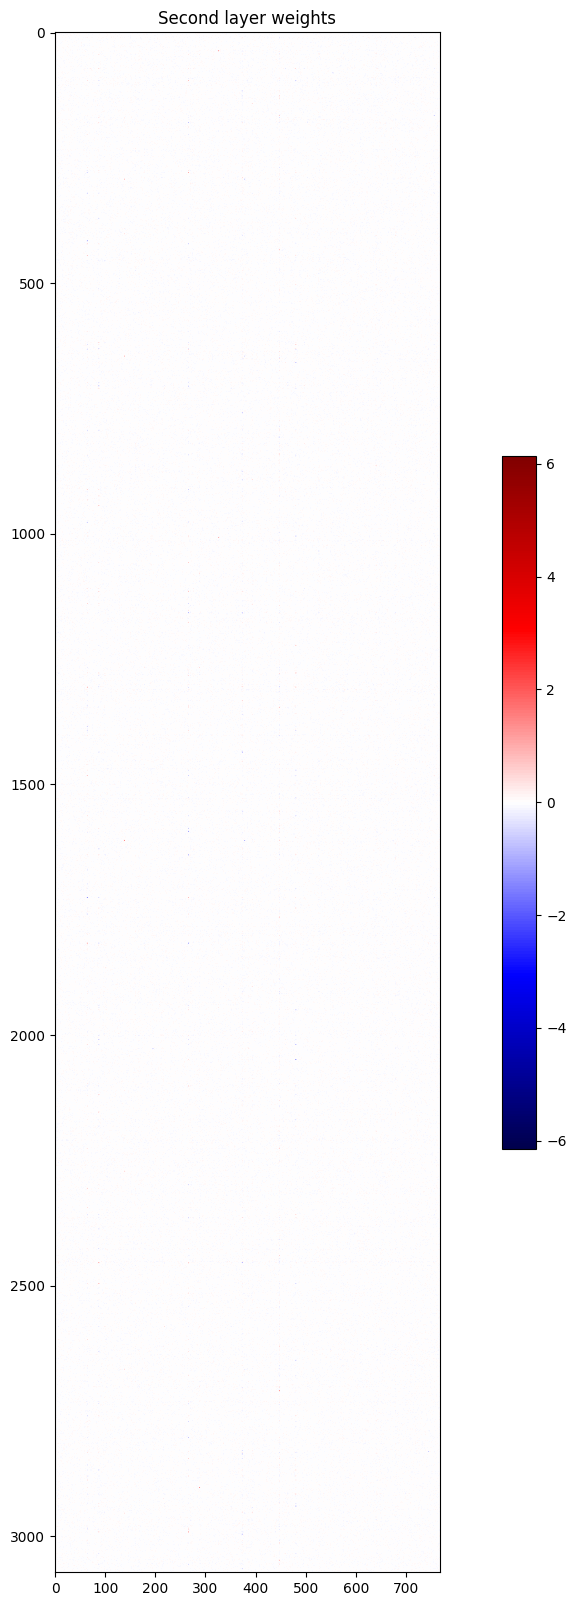

In [5]:
plt.figure(1, (40,20))
norm = TwoSlopeNorm(vmin=-np.abs(second_layer_weight).max(), vmax=np.abs(second_layer_weight).max(), vcenter=0)
plt.imshow(second_layer_weight, cmap='seismic', norm=norm)
plt.colorbar(shrink=0.45, pad=0.02)
plt.title('Second layer weights')
plt.show()

Loading the output of the FFNN

In [6]:
first_hidden_layer  = torch.load("output/decoder/decoder_1/FirstLayerNN.pt").detach().numpy()[0]
second_hidden_layer = torch.load("output/decoder/decoder_1/SecondLayerNN.pt").detach().numpy()[0]

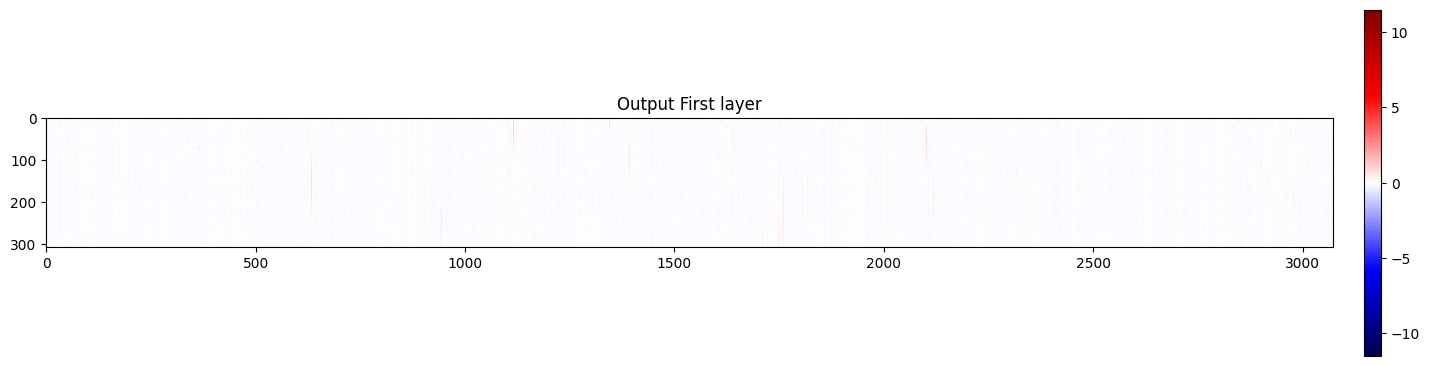

In [7]:
norm = TwoSlopeNorm(vmin=-np.abs(first_hidden_layer).max(), vmax=np.abs(first_hidden_layer).max(), vcenter=0)

plt.figure(1, (20,10))
plt.imshow(first_hidden_layer, cmap='seismic', norm = norm)
plt.colorbar(shrink=0.45, pad=0.02)
plt.title('Output First layer')
plt.show()

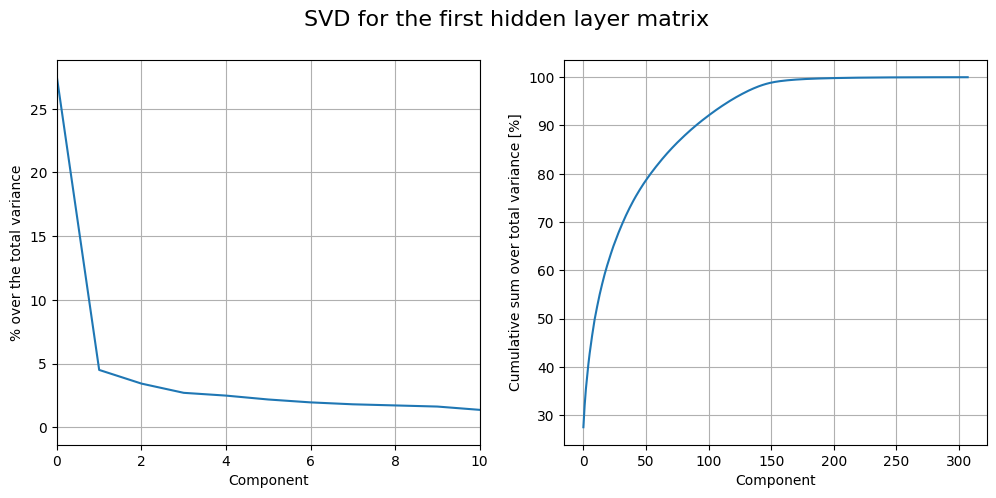

In [8]:
svd(first_hidden_layer, 'first hidden layer')

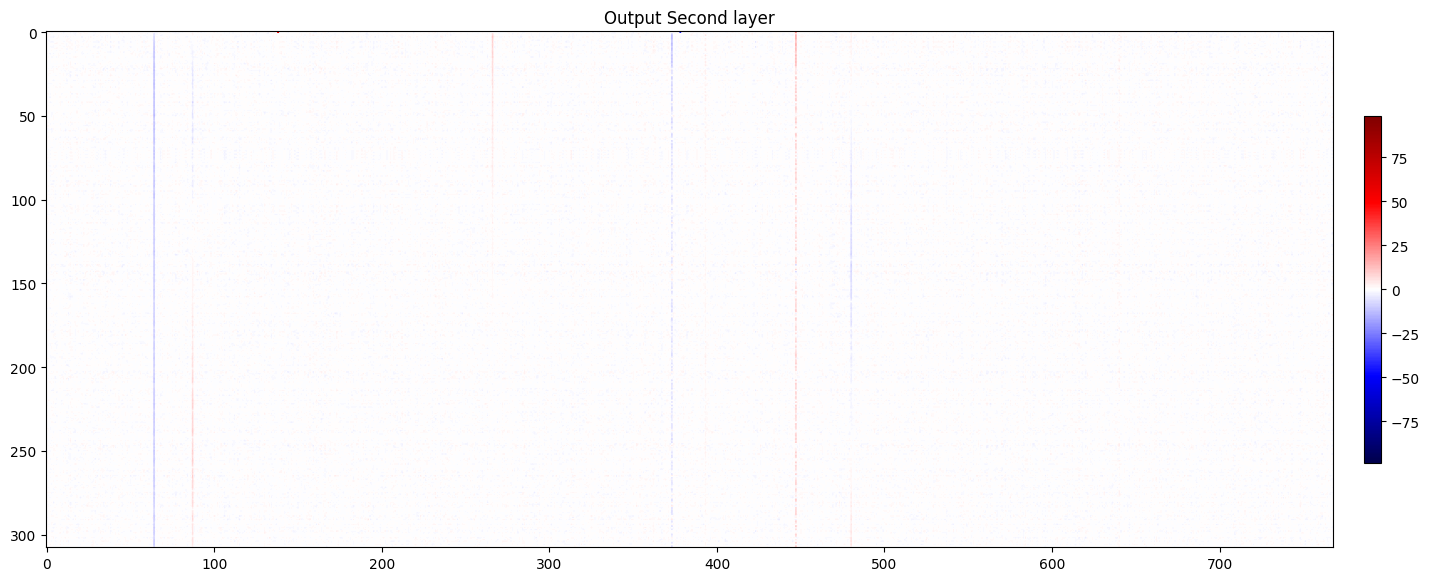

In [9]:
norm = TwoSlopeNorm(vmin=-np.abs(second_hidden_layer).max(), vmax=np.abs(second_hidden_layer).max(), vcenter=0)

plt.figure(1, (20,10))
plt.imshow(second_hidden_layer, cmap='seismic', norm = norm)
plt.colorbar(shrink=0.45, pad=0.02)
plt.title('Output Second layer')
plt.show()

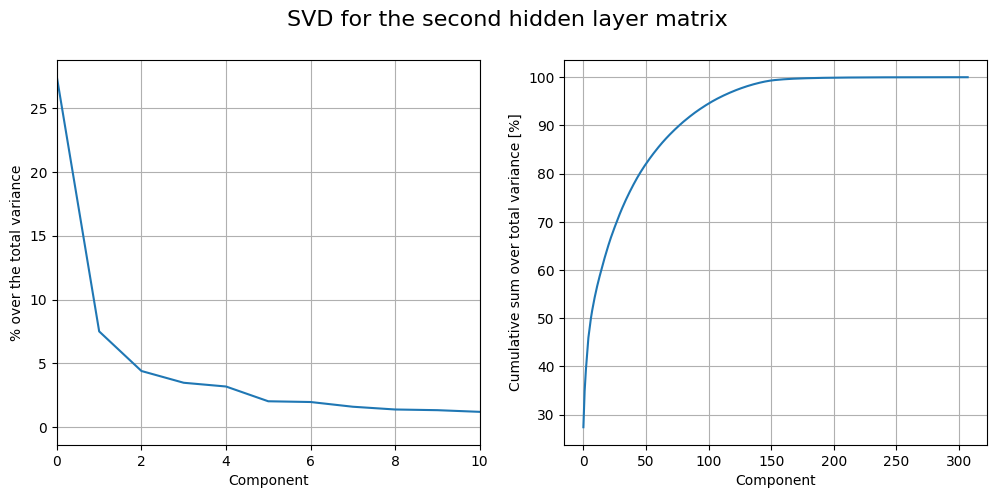

In [10]:
svd(second_hidden_layer, 'second hidden layer')

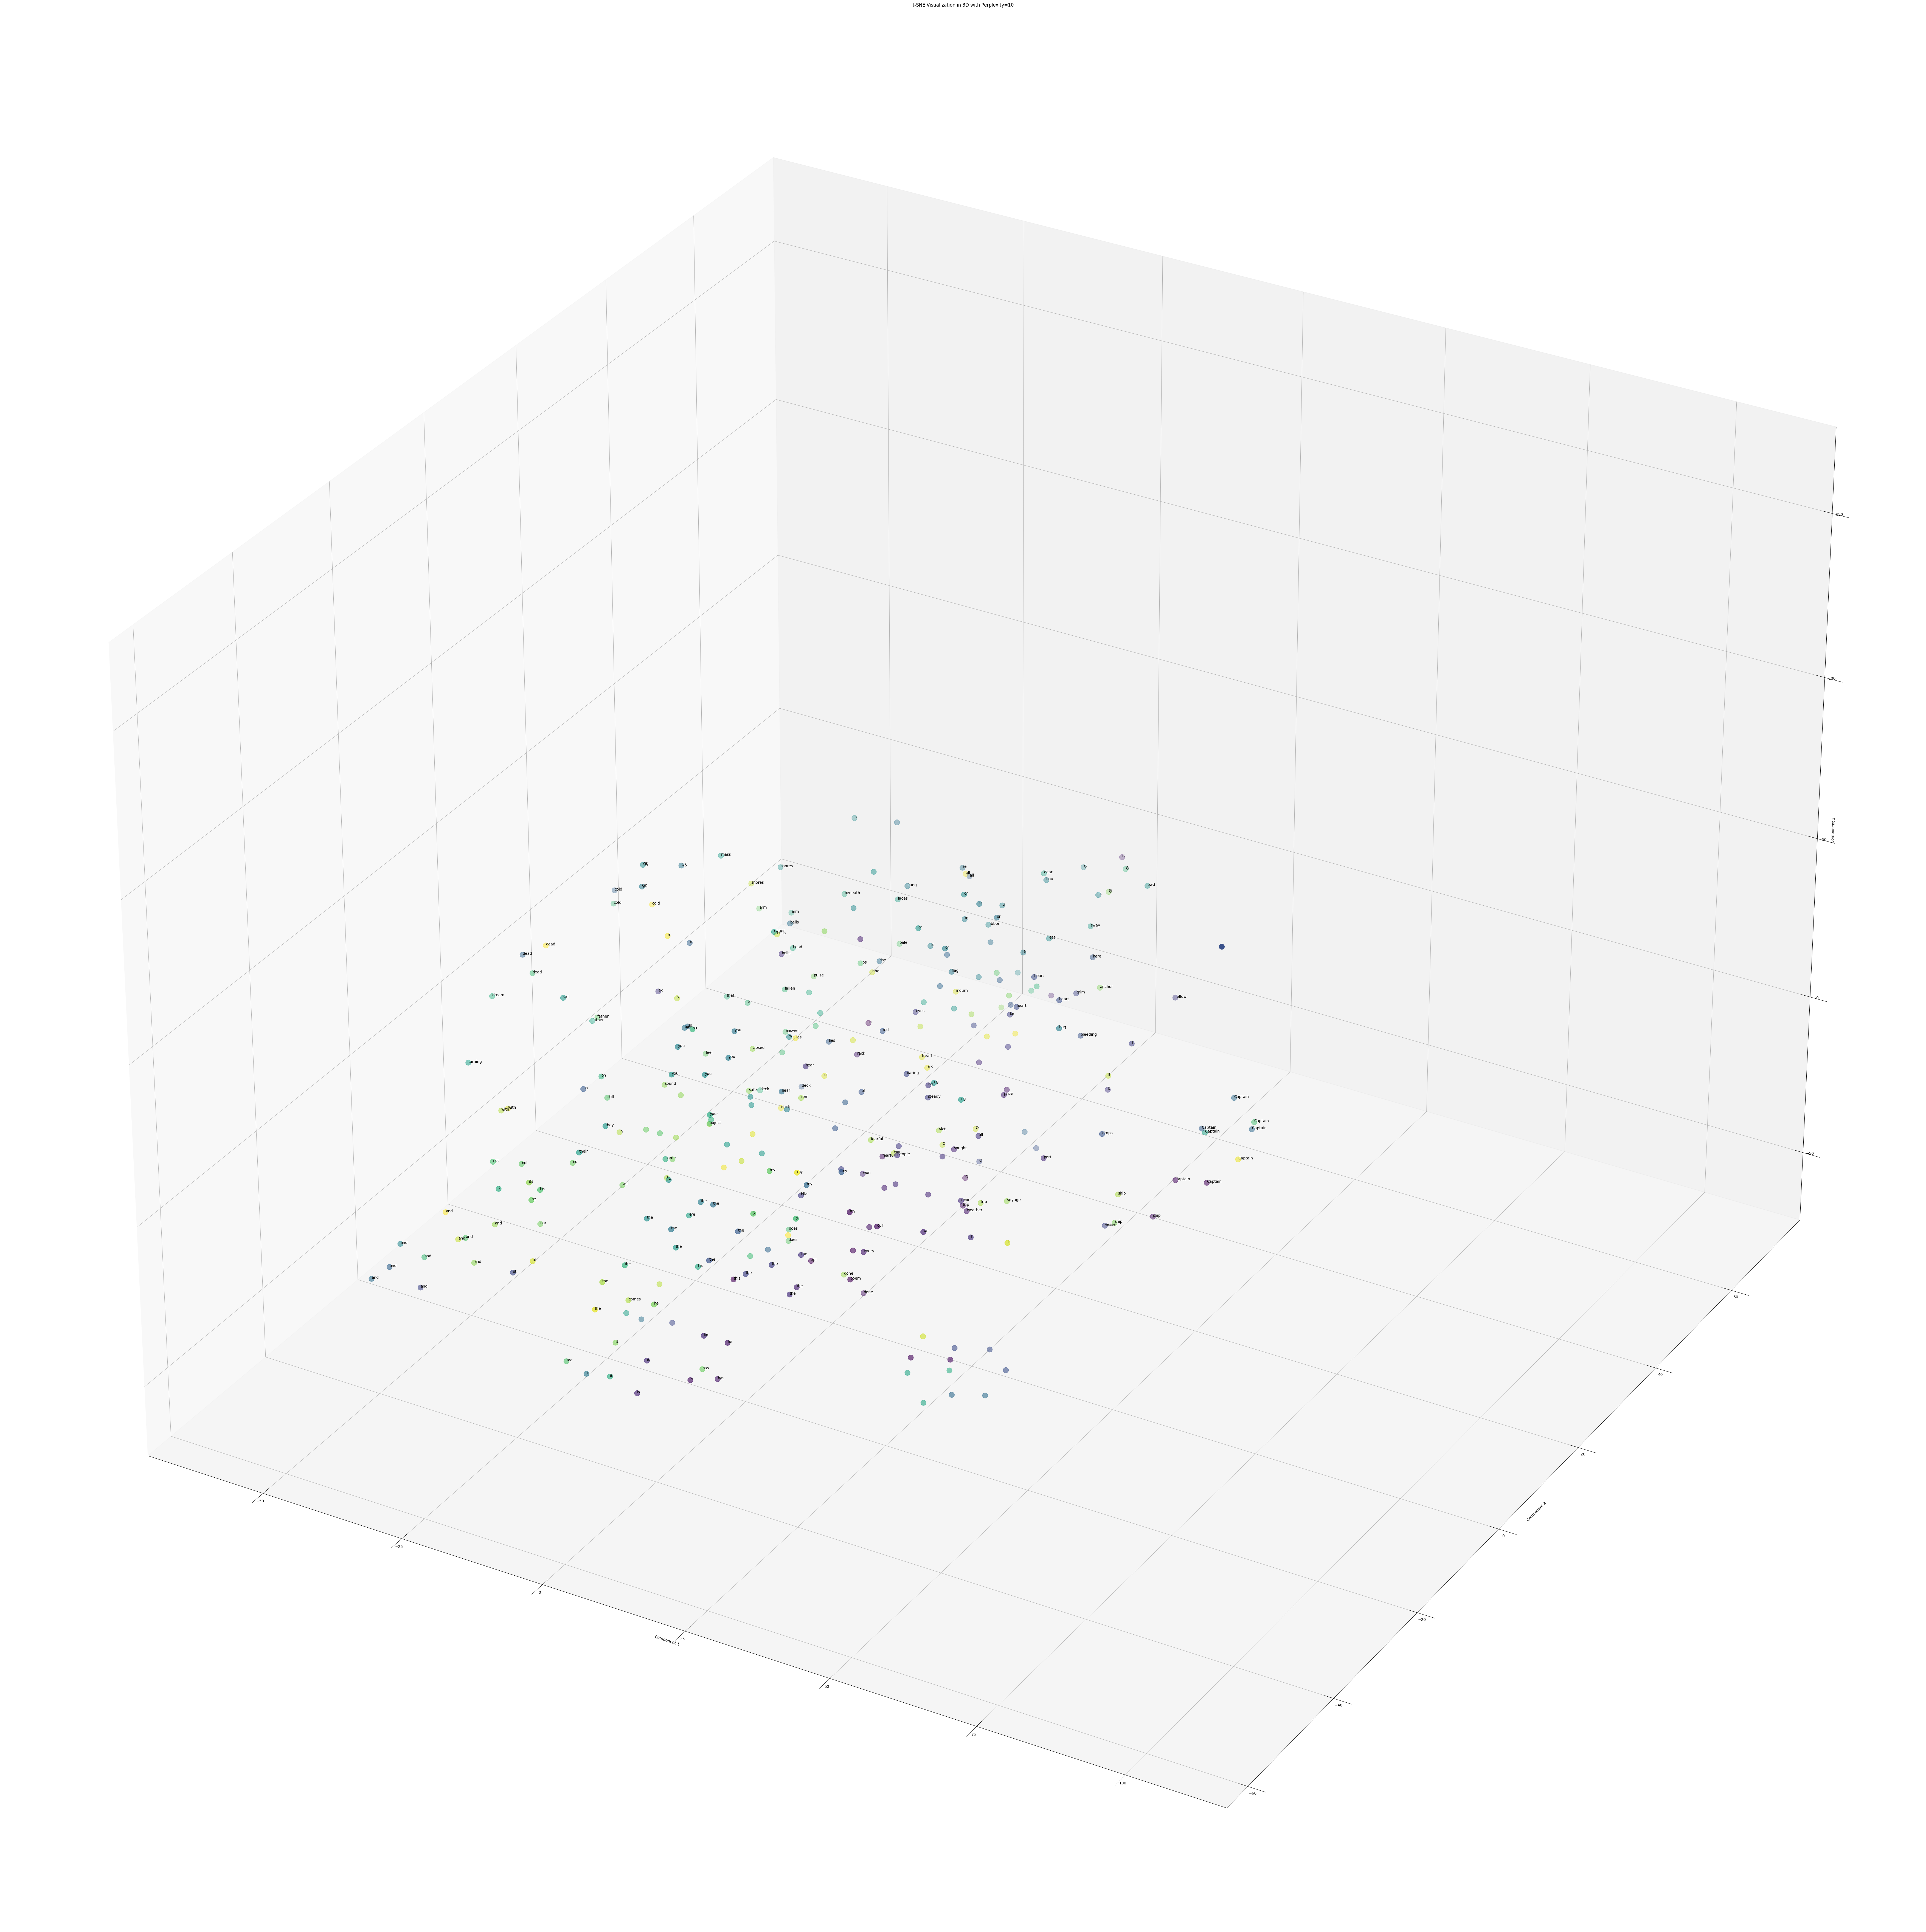

In [22]:
apply_TSNE(df, second_hidden_layer)

In [11]:
first_decoder = results + second_hidden_layer

NameError: name 'results' is not defined